## Import packages and data

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

from textwrap import wrap

In [52]:
from visualisation_scripts import *

In [53]:
sns.set_theme()
sns.set_context('paper')

In [54]:
pd.set_option('display.max_colwidth', None) 

In [55]:
df = pd.read_excel('data/diamond_pipelines_data.xlsx')

In [56]:
meta = pd.read_excel('data/diamond_pipelines_metadata.xlsx',index_col=0)

## Clean data

In [57]:
df = df.replace('\xa0', ' ', regex=True).replace(' ;', ';', regex=True)

In [58]:
df = df.apply(lambda x: x.str.strip() if x.dtype == object else x)

In [59]:
df = df.apply(lambda x: x.str.strip(';') if x.dtype == object else x)

In [60]:
meta = meta.replace('\xa0', ' ', regex=True)

In [61]:
meta_name = meta.loc[['name']]

In [62]:
meta_question = meta.loc[['question']]

In [63]:
meta_practice = meta.loc[['practice']]

In [64]:
meta_category = meta.loc[['category']]

## Data groups

In [65]:
relevance_dev = ['requirements_rel','data_rel','programming_rel','lifecycle_rel','refactoring_rel']

relevance_doc = ['conceptual_rel','code_doc_rel','data_doc_rel','tutorial_rel']

relevance_test = ['code_testing_rel','evaluation_rel','continuous_integration_rel']

relevance_open = ['version_control_rel','issue_tracking_rel','open_rel']
    
relevance_deploy = ['dependencies_rel','sys_req_rel','continuous_deployment_rel']

relevance = relevance_dev + relevance_doc + relevance_test + relevance_open + relevance_deploy

In [66]:
practice_category = meta.loc['category'][relevance].to_dict()

## Model development

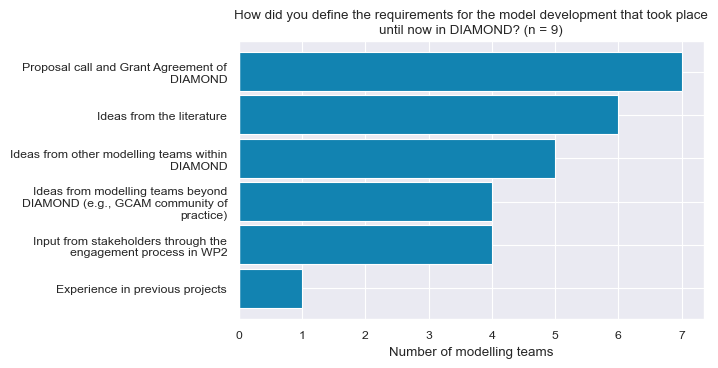

In [67]:
fig = barh_split('requirements_def', ';', df, meta_question, 
                 xlabel='Number of modelling teams', file_name='1.1_requirements_def.pdf', 
                 bar_height=0.6, width=6, ytick_width=40)

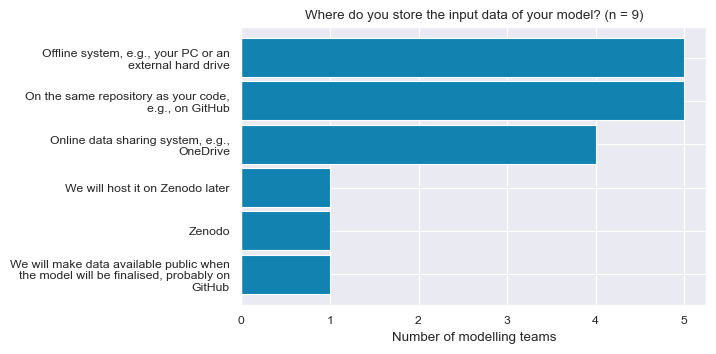

In [68]:
fig = barh_split('data_store', ';', df, meta_question, 
                xlabel='Number of modelling teams', file_name='1.2_data_store.pdf')

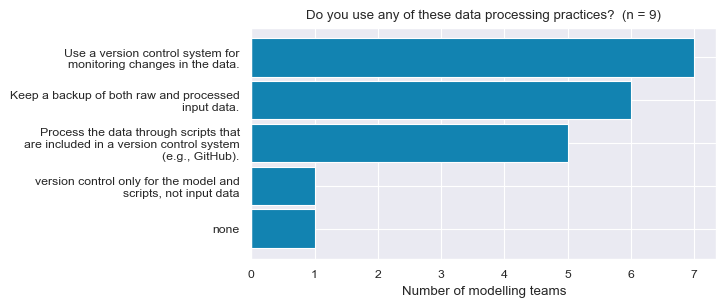

In [69]:
fig = barh_split('data_processing', ';', df, meta_question,
                xlabel='Number of modelling teams', file_name='1.2_data_processing.pdf')

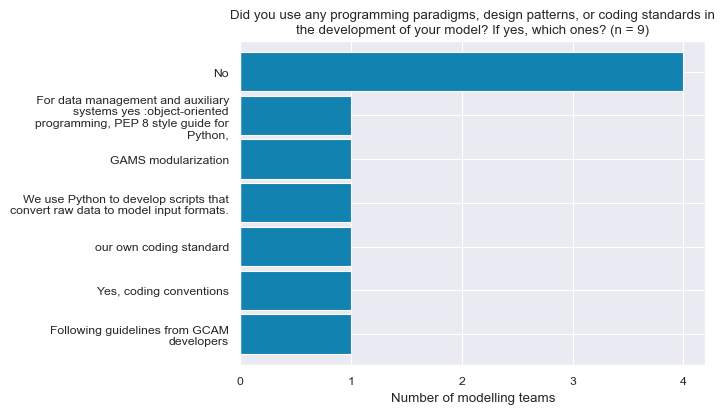

In [70]:
fig = barh_split('programming_use', ';', df.replace('no', 'No', regex=True), meta_question,
                 xlabel='Number of modelling teams')
fig.set_xticks(range(5))
plt.savefig(f'figures/1.3_programming_use.pdf', bbox_inches='tight')

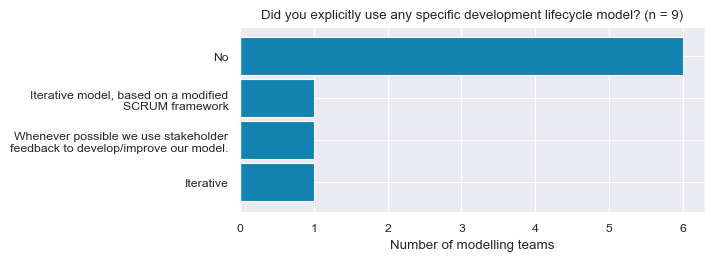

In [71]:
fig = barh_split('lifecycle_use', ';', df.replace('no', 'No', regex=True), meta_question, 
                xlabel='Number of modelling teams', file_name='1.4_lifecycle_use.pdf')

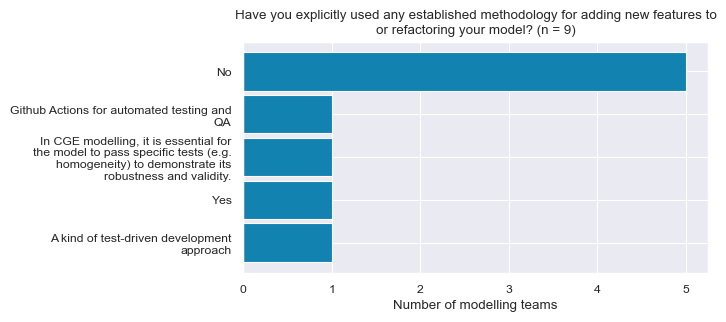

In [72]:
fig = barh_split('refactoring_use', ';', df.replace('no', 'No', regex=True), meta_question,
                xlabel='Number of modelling teams', file_name='1.5_refactoring_use.pdf')

## Documentation

In [73]:
df_conceptual_use = df[['model','conceptual_use']]
df_conceptual_use.columns = df_conceptual_use.columns.map(lambda x: meta_question[x].iloc[0]).str.replace('\n','',regex=True)
df_conceptual_use

,Which model are you working on in the context of DIAMOND?,Do you have any further suggestions on what to include in the conceptual documentation of our models apart from the aspects listed above?
0,OMNIA,no
1,NEMESIS-World,"List of model variables, equations, parameters in Annex"
2,GCAM-Europe,Validation test runs for new functions and data in the model
3,GCAM-Europe,More detailed instructions of data inputs and steps on how to run the model
4,GEMINI-E3 EU,no
5,openTEPES,No
6,CLEWS-EU,"How to assemble the model, run it and visualise results."
7,ENGAGE,"If the model is going to be open-source, we need to produce a user guide."
8,OPEN-PROM,No


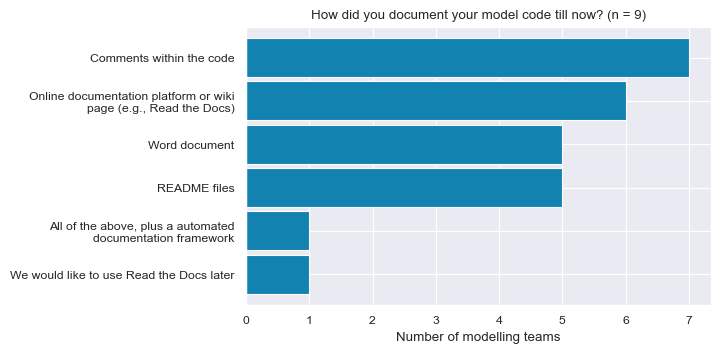

In [74]:
fig = barh_split('code_doc_use',';',df.replace('no', 'No', regex=True),meta_question,
                 xlabel='Number of modelling teams', file_name='2.2_code_documentation.pdf')

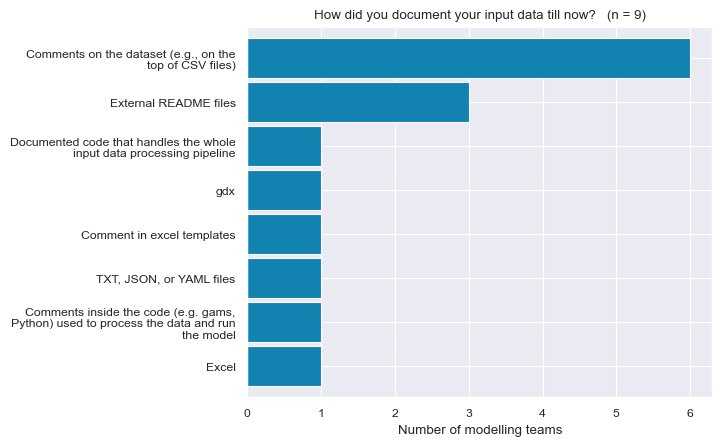

In [75]:
fig = barh_split('data_doc_use',';',df.replace('no', 'No', regex=True),meta_question,
                 xlabel='Number of modelling teams', file_name='2.3_data_documentation.pdf')

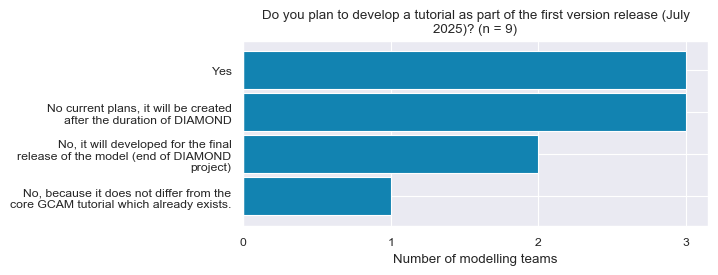

In [76]:
fig = barh_split('tutorial_use',';',df,meta_question,
                 xlabel='Number of modelling teams')
fig.set_xticks(range(4))
plt.savefig(f'figures/2.4_tutorials.pdf', bbox_inches='tight')

## Evaluation

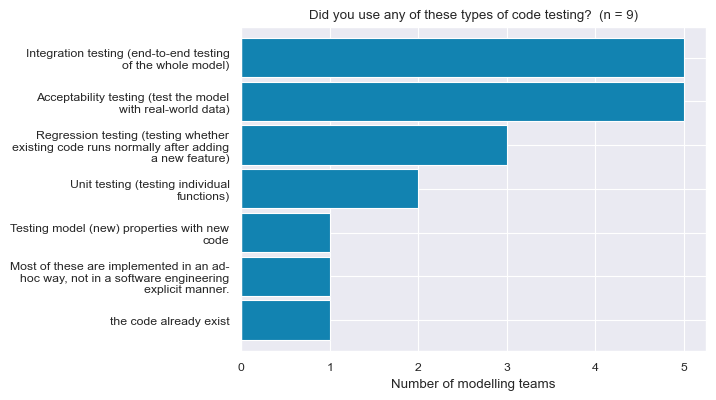

In [77]:
fig = barh_split('code_testing_use',';',df,meta_question,
                 xlabel='Number of modelling teams', file_name='3.1_code_testing.pdf')

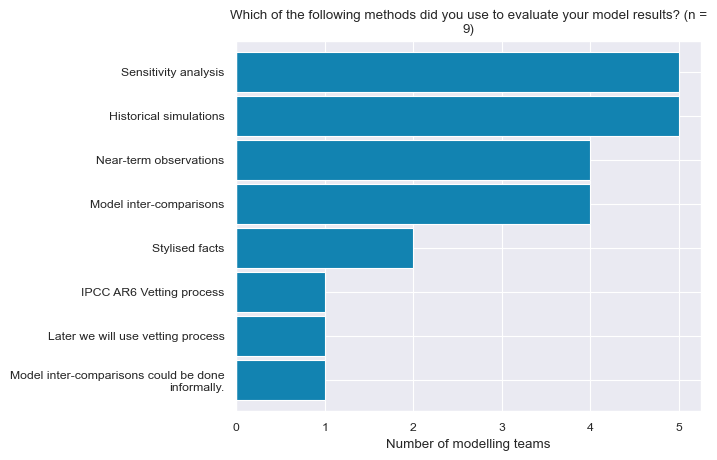

In [78]:
fig = barh_split('evaluation_use',';',df,meta_question,
                 xlabel='Number of modelling teams', file_name='3.2_evaluation_used.pdf')

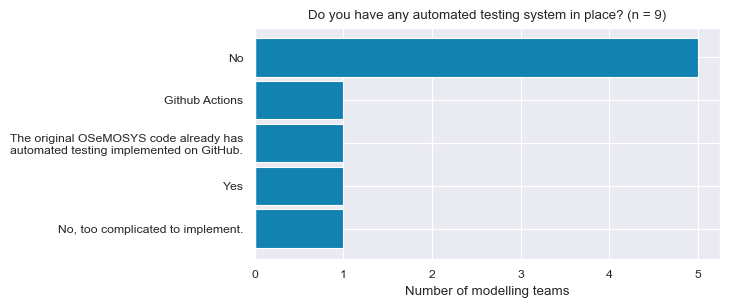

In [79]:
fig = barh_split('continuous_integration_use',';',df.replace('no', 'No', regex=True),meta_question,
                 xlabel='Number of modelling teams')
fig.set_xticks(range(6))
plt.savefig(f'figures/3.3_continuous_integration.pdf', bbox_inches='tight')

## Versioning and collaboration

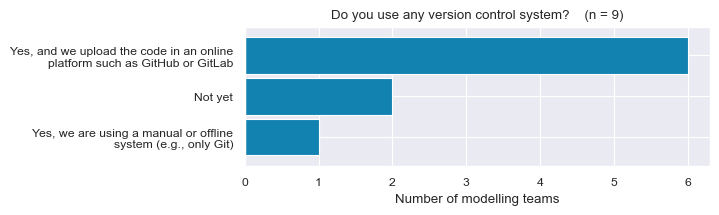

In [80]:
fig = barh_frequency('version_control_use',df,meta_question,
                 xlabel='Number of modelling teams', file_name='4.1_versioning.pdf')

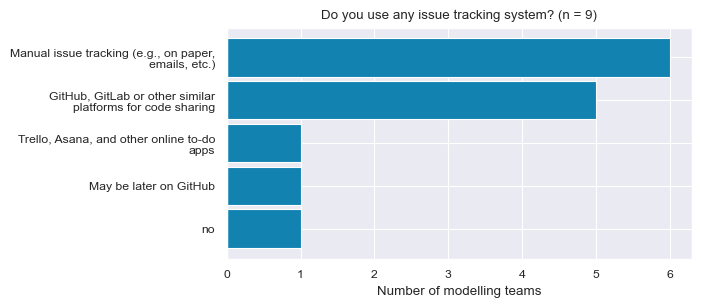

In [81]:
fig = barh_split('issue_tracking_use',';',df,meta_question,
                 xlabel='Number of modelling teams', file_name='4.2_issue_tracking.pdf')

In [82]:
df_open_license = df[['model','open_license']]
df_open_license.columns = df_open_license.columns.map(lambda x: meta_question[x].iloc[0]).str.replace('\n','',regex=True)
df_open_license

,Which model are you working on in the context of DIAMOND?,Which open-source license will you use for your model?
0,OMNIA,not yet finalised with the OMNIA team
1,NEMESIS-World,CC-BY-NC-SA
2,GCAM-Europe,Educational community license 2.0
3,GCAM-Europe,ECL
4,GEMINI-E3 EU,not yet fully determined
5,openTEPES,GNU AFFERO GPL3
6,CLEWS-EU,MIT
7,ENGAGE,ENGAGE is not an open-source model. We are not producing an open-source version of ENGAGE
8,OPEN-PROM,We will go with GNU AGPLv3 (https://choosealicense.com/licenses/agpl-3.0/) but we will add the “Commons Clause” to restrict commercial use: https://commonsclause.com/


In [83]:
df_open_data = df[['model','open_data']]
df_open_data.columns = df_open_data.columns.map(lambda x: meta_question[x].iloc[0]).str.replace('\n','',regex=True)
df_open_data

,Which model are you working on in the context of DIAMOND?,"Are your input data open access? If yes, what is their license? If not, are there any alternative open access datasets that can be used?"
0,OMNIA,yes
1,NEMESIS-World,"Almost all, except one source without any alternative. Main sources: EXIOBASE (CC-BY-SA-NC), UN Energy Statistics Database processed by OMNIA team (free), OECD (free)"
2,GCAM-Europe,"Yes, Eurostat: Creative Commons Attribution 4.0 International License"
3,GCAM-Europe,Yes
4,GEMINI-E3 EU,no we use GTAP database
5,openTEPES,There are some case studies in GitHub
6,CLEWS-EU,"It is open access data. Creative Commons Attribution-4.0 International license (Eurostat, JRC-IDEES, Faostat, EU-Reference scenario)"
7,ENGAGE,"No, the GTAP database requires a license. There are some alternative sources, but they require processing and adaptation."
8,OPEN-PROM,"Most of them are not, but we don't distribute input data anyway. We show people how to generate them, though"


## Deployment

In [84]:
df_dependencies_use = df[['model','dependencies_use']]
df_dependencies_use.columns = df_dependencies_use.columns.map(lambda x: meta_question[x].iloc[0]).str.replace('\n','',regex=True)
df_dependencies_use

,Which model are you working on in the context of DIAMOND?,"What dependencies does your model currently have? If available, you can also provide a link to a requirements.txt file or a page that you document the dependencies."
0,OMNIA,GAMS and VEDA2.0 interface
1,NEMESIS-World,"Iode software (https://github.com/plan-be/iode), and pyiode python package (https://readsthedocs.com/) than should be dependant from others Python packages, pymrio, pandas, numpy, MS Excel for data processing."
2,GCAM-Europe,"Dependency to tidyr 1.1.3, detailed in readme file. All requirements are detailed in the GCAM documentation to successfully run the model and to build the datasystem, the requirements are inherent to the gcamdata R package."
3,GCAM-Europe,"Supply and demand curves, historical emissions and energy data, population and GDP and overall socioeconomic projections. See all sector inputs (supply, demand, land, ecomony) here https://jgcri.github.io/gcam-doc/index.html"
4,GEMINI-E3 EU,no dependency
5,openTEPES,https://github.com/IIT-EnergySystemModels/openTEPES/blob/master/environment.yaml\ndependencies:\n - altair=5.0.1\n - colorama=0.4.6\n - colour=0.1.5\n - gurobi=12.0.0\n - matplotlib=3.9.2\n - matplotlib-base=3.9.2\n - networkx=3.3\n - numpy=1.26.4\n - pandas>=2.2.2\n - pip=24.2\n - plotly=5.24.1\n - psutil=6.1.0\n - pip:\n - gurobipy==12.0.0\n - pyomo==6.8.1
6,CLEWS-EU,We use a YAML file to run OSeMOSYS models through Otoole. We will create a README in the model documentation that will detail the dependencies for running the CLEWS-EU model.
7,ENGAGE,"It depends on the model application. Sometimes we link it with river systems model, material flow analysis models."
8,OPEN-PROM,"GAMS (mandatory), R (optional)"


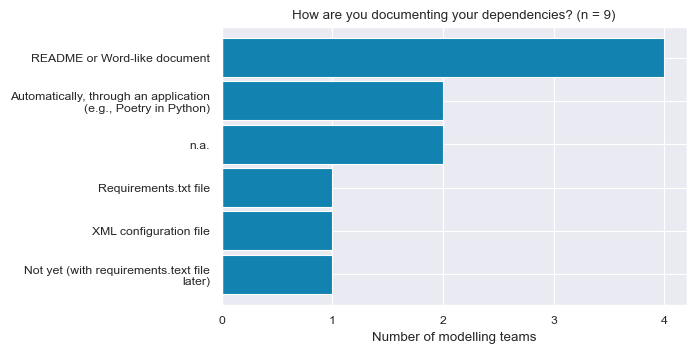

In [85]:
fig = barh_split('dependencies_doc',';',df.replace('no', 'n.a.', regex=True), meta_question, xlabel='Number of modelling teams') 
fig.set_xticks(range(5))
plt.savefig(f'figures/5.1_dependencies_documentation.pdf', bbox_inches='tight')

In [86]:
df_sys_req_use = df[['model','sys_req_use']]
df_sys_req_use.columns = df_sys_req_use.columns.map(lambda x: meta_question[x].iloc[0]).str.replace('\n','',regex=True)
df_sys_req_use

,Which model are you working on in the context of DIAMOND?,What are the (estimated) system requirements for running your model?
0,OMNIA,"Hardware needed depends on the size and complexity of models, but here is a configuration suitable for typical TIMES models under Veda2.0:\n- Windows\n- CPU: Minimum 4 cores are recommended for STANDARD and ADVANCED licenses. 8 - 16 would be desirable for larger models\n- RAM: 4-8 GB is enough for Veda, but GAMS needs more RAM for larger models. 32 GB would accomodate most models\n- HDD: 500GB - 1TB free space for Veda and GAMS files"
1,NEMESIS-World,No idea (laptop with relatively recent processors)
2,GCAM-Europe,"Any operating system. 16 GB memory recommended, computational power affects running time. Disk space for model itself ~18 GB. Every saved scenario occupies around 3 GB of additional space."
3,GCAM-Europe,GCAM requires significant computational resources. A GCAM model simulation will utilize over 8 GB of system RAM and storing the full results of the simulation will take around 3 GB of disk space per scenario.
4,GEMINI-E3 EU,Windows
5,openTEPES,"Windows, MacOS, Linux\n128GB of memory for the European Case"
6,CLEWS-EU,"We have run only the aggregated and disaggregated sectoral models until now. These smaller models require 32 GB of RAM and an Intel Core i7-2.8 GHz processor. The model creates LP files during the matrix generation process, which needs a few GBs of hard disk memory. However, these files are temporary."
7,ENGAGE,"It depends on the size of the model and application. For large models we use an in-house high performance computer (e.g. 96 ram, 5.7 GHz CPU speed). For applications that require model linkages, iteration processes and machine learning, we use a super computer."
8,OPEN-PROM,>4GM RAM is the only system requirement


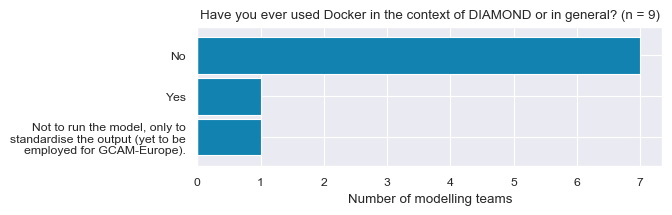

In [87]:
fig = barh_split('continuous_deployment_use',';',df.replace('no', 'No', regex=True),meta_question,
                xlabel='Number of modelling teams', file_name='5.2_continuous_integration.pdf')

## Other questions

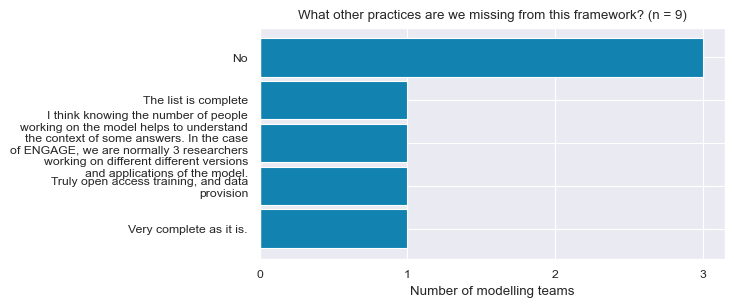

In [88]:
fig = barh_split('other_practices',';',df.replace('nothing', 'No', regex=True),meta_question, ytick_width=40,
                xlabel='Number of modelling teams')
fig.set_xticks(range(4))
plt.savefig(f'figures/other_practices.pdf', bbox_inches='tight')

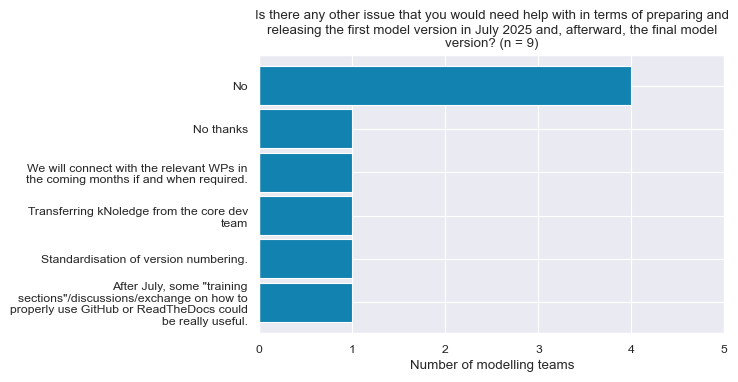

In [89]:
fig = barh_split('other_issues',';',df.replace('no', 'No', regex=True).replace('No.', 'No', regex=True),meta_question,
                xlabel='Number of modelling teams')
fig.set_xticks(range(6))
plt.savefig(f'figures/other_issues.pdf', bbox_inches='tight')

## Relevance comparison

/Users/gxexakis/code/IAM-development-practices/visualisation_scripts.py:291: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  g.set_yticklabels(['\n'.join(wrap(meta[l.get_text()][0], ytick_width)) for l in g.get_yticklabels()])


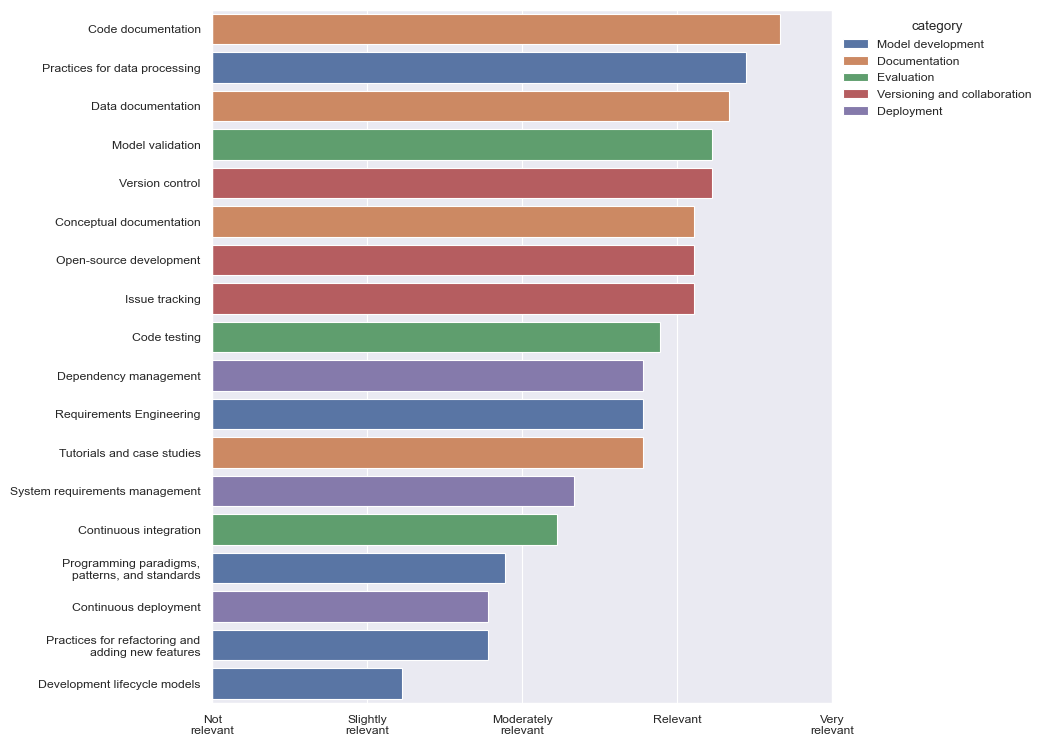

In [90]:
fig = barh_num_likert(df[relevance],meta_practice,cat=practice_category,scale=scale_relevant, bar_height=0.5,
    file_name='Overall_relevance_model_development.pdf', ytick_width=30, width=8)

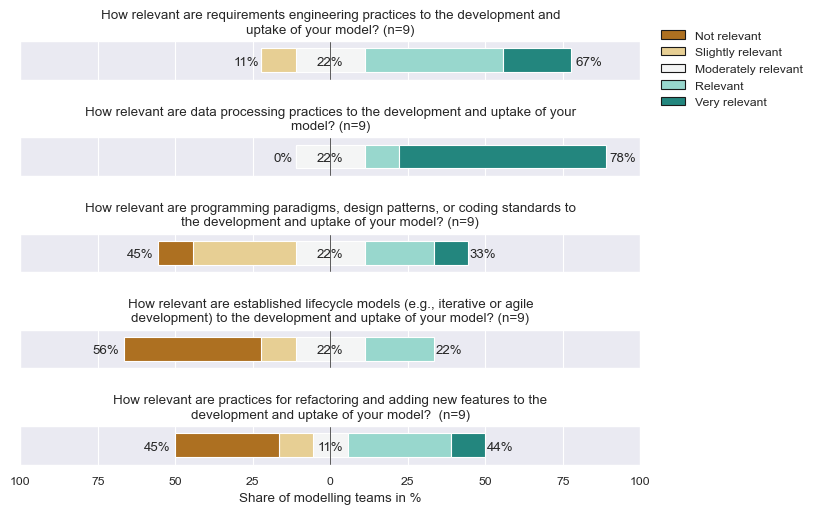

In [91]:
fig = split_barh_likert(relevance_dev,df,meta_question,scale=scale_relevant,scale_color=scale_relevant_color,
                       xlabel='Share of modelling teams in %', file_name='1R_relevance_model_development.pdf')

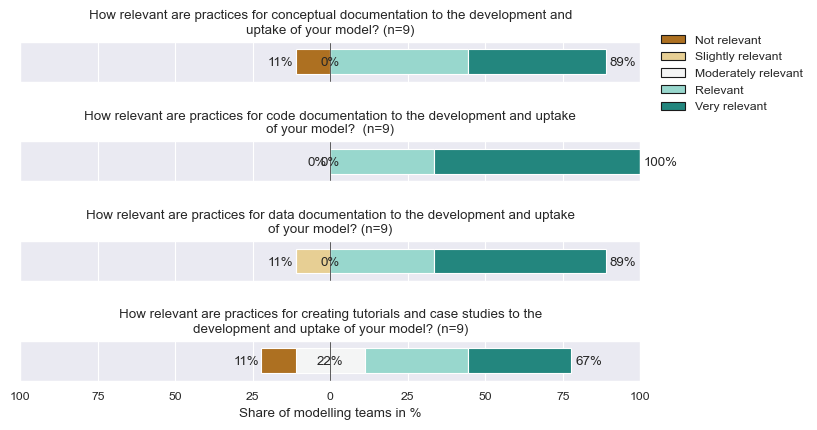

In [92]:
fig = split_barh_likert(relevance_doc,df,meta_question,scale=scale_relevant,scale_color=scale_relevant_color,
                       xlabel='Share of modelling teams in %', file_name='2R_relevance_documentation.pdf')

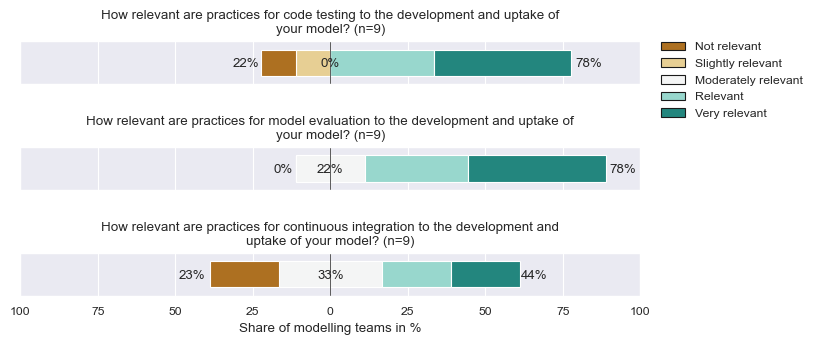

In [93]:
fig = split_barh_likert(relevance_test,df,meta_question,scale=scale_relevant,scale_color=scale_relevant_color,
                       xlabel='Share of modelling teams in %', file_name='3R_relevance_evaluation.pdf')

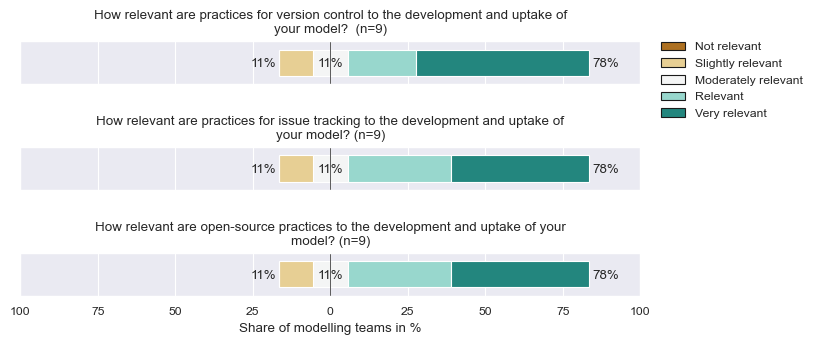

In [94]:
fig = split_barh_likert(relevance_open,df,meta_question,scale=scale_relevant,scale_color=scale_relevant_color,
                       xlabel='Share of modelling teams in %', file_name='4R_relevance_versioning.pdf')

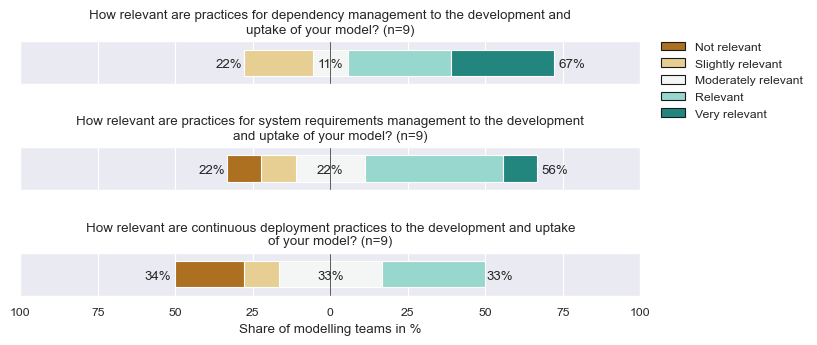

In [95]:
fig = split_barh_likert(relevance_deploy,df,meta_question,scale=scale_relevant,scale_color=scale_relevant_color,
                       xlabel='Share of modelling teams in %', file_name='5R_relevance_deployment.pdf')

## Responses per model

In [96]:
cols_to_remove = ['id','start','end','email','name']

In [97]:
df_public = df[df.columns[~df.columns.isin(cols_to_remove)]]
df_public.columns = df_public.columns.map(lambda x: meta_name[x].iloc[0]).str.replace('\n','',regex=True)

In [98]:
df.model

0            OMNIA
1    NEMESIS-World
2      GCAM-Europe
3      GCAM-Europe
4     GEMINI-E3 EU
5        openTEPES
6         CLEWS-EU
7           ENGAGE
8        OPEN-PROM
Name: model, dtype: object

In [99]:
df_public[
    df_public['Model']=='ENGAGE'
].T.replace(';','; ',regex=True)

,7
Organisation,UCL
Model,ENGAGE
Developer in team,No
Requirements definition till now,Input from stakeholders through the engagement process in WP2
Requirements engineering relevance,Relevant
Data storage used,"Offline system, e.g., your PC or an external hard drive; Online data sharing system, e.g., OneDrive"
Data processing practices,Keep a backup of both raw and processed input data.; Use a version control system for monitoring changes in the data.
Data processing relevance,Very relevant
Programming paradigms used,No
Programming paradigms relevance,Not relevant
